In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
data = pd.read_csv("Medical cost.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [81]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [82]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: >

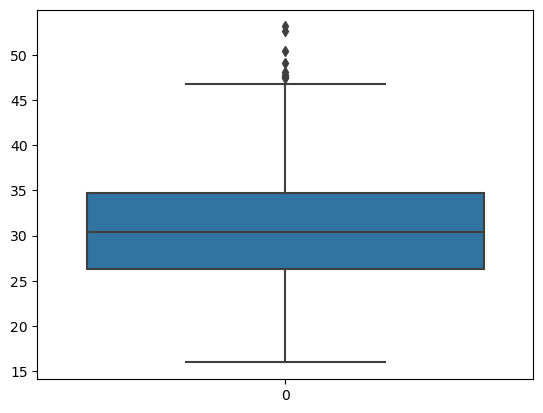

In [83]:
sns.boxplot(data['bmi'])

<Axes: >

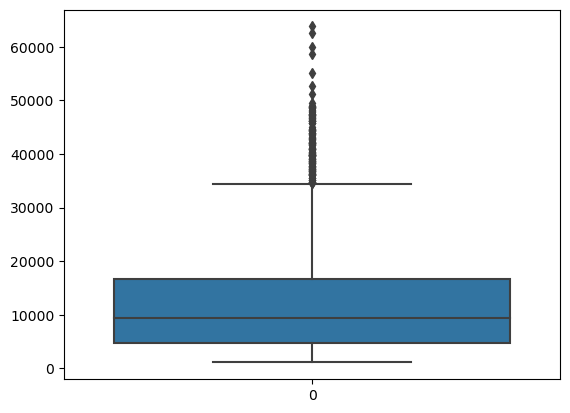

In [84]:
sns.boxplot(data['charges'])

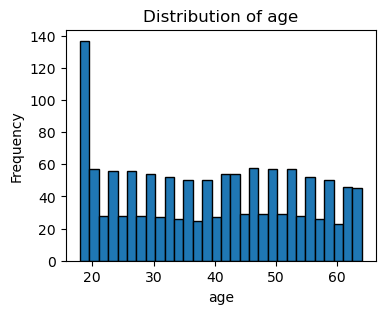

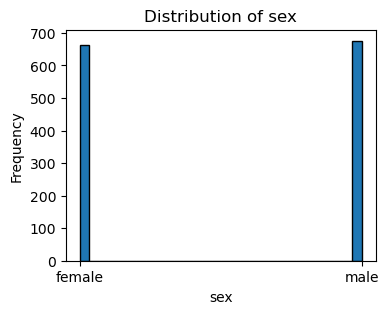

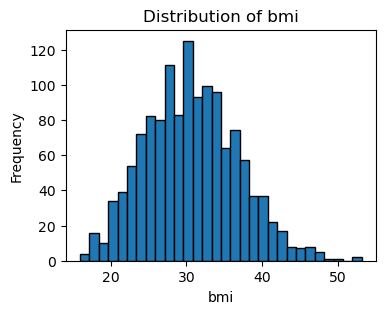

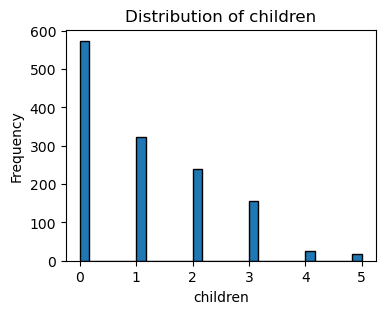

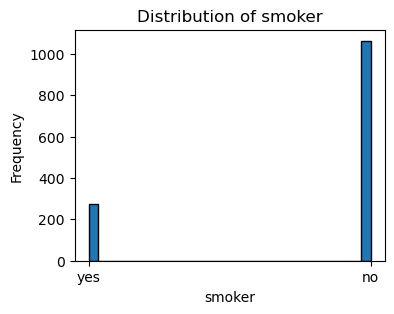

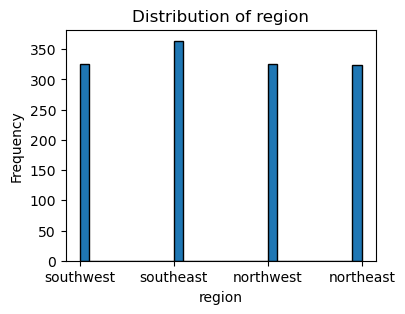

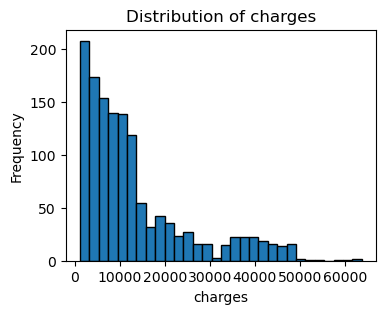

In [85]:
for col in data.columns:
    plt.figure(figsize=(4, 3))
    plt.hist(data[col], bins=30, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()
# sex - bernoulli
# age - normal
# bmi - normal
# children - geometric?
# smoker - bernoulli
# charges - right skewed

In [86]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<Axes: xlabel='age', ylabel='charges'>

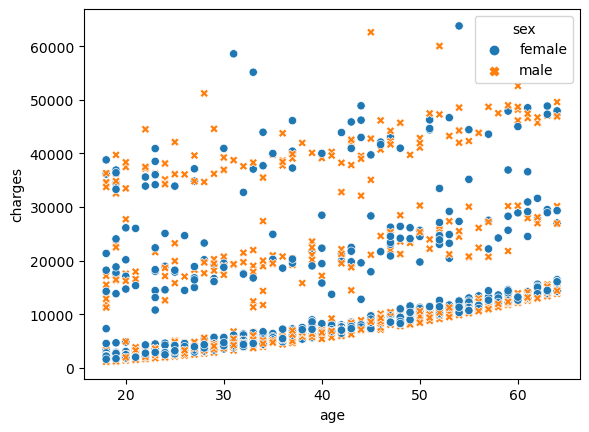

In [87]:
sns.scatterplot(data=data, x='age', y='charges', hue='sex', style='sex')

<Axes: xlabel='age', ylabel='charges'>

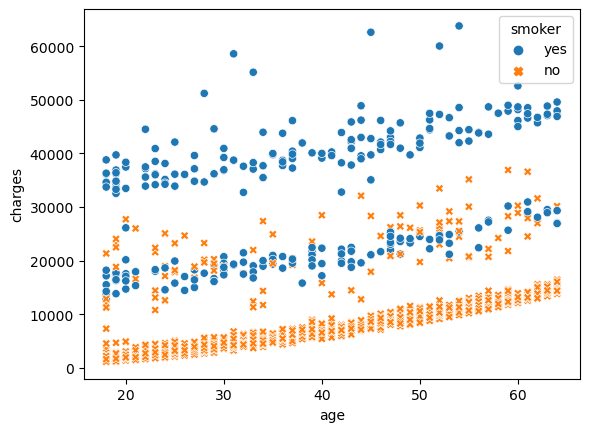

In [88]:
sns.scatterplot(data=data, x='age', y='charges', hue='smoker', style='smoker')

<Axes: xlabel='bmi', ylabel='charges'>

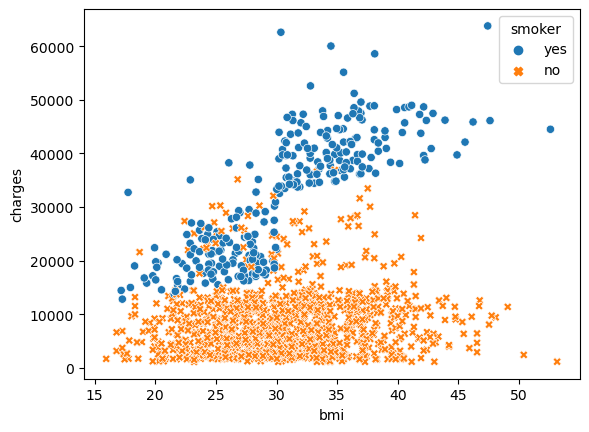

In [89]:
sns.scatterplot(data=data, x='bmi', y='charges', hue='smoker', style='smoker')

<Axes: xlabel='children', ylabel='charges'>

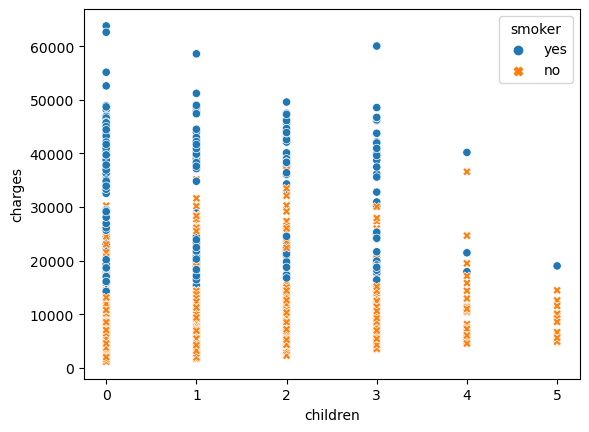

In [90]:
sns.scatterplot(data=data, x='children', y='charges', hue='smoker', style='smoker')

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
label_encoder = LabelEncoder()

In [93]:
data['region'] = label_encoder.fit_transform(data['region'])
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])

<Axes: >

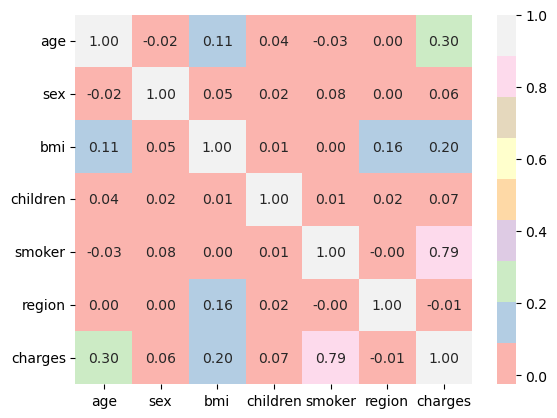

In [94]:
sns.heatmap(data.corr(), annot=True, cmap='Pastel1', fmt=".2f")


In [95]:
# data.drop(columns=['region'], inplace=True)

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [97]:
y = data['charges']
x = data.drop(columns=['charges'])

In [98]:
x_scaled = scaler.fit_transform(x)

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [101]:
regressor = GradientBoostingRegressor(n_estimators=215, learning_rate=0.02, subsample=0.28, random_state=35)

In [102]:
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 18254617.109514657
Root Mean Squared Error (RMSE): 4272.542230278673
Mean Absolute Error (MAE): 2491.3615993019857
R-squared (R2): 0.8824169644794685
